In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.datasets import load_diabetes
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

sns.set_theme()

In [52]:
banking = pd.read_csv('SRC/banking.csv')

In [50]:
'''fico= np.array(banking['fico_range'])

fico_range = []
for x in fico:
    fico_range.append(x.split('-'))

fico_range = pd.DataFrame(fico_range)'''

"fico= np.array(banking['fico_range'])\n\nfico_range = []\nfor x in fico:\n    fico_range.append(x.split('-'))\n\nfico_range = pd.DataFrame(fico_range)"

In [49]:
'''fico_range = []
for x in fico:
    fico_range.append(x.split('-'))

fico_range = pd.DataFrame(fico_range)'''

"fico_range = []\nfor x in fico:\n    fico_range.append(x.split('-'))\n\nfico_range = pd.DataFrame(fico_range)"

In [47]:
#fico_range.iloc[:, 0]

In [48]:
#banking["fico_lower"] = fico_range.iloc[:, 0]
#banking["fico_upper"] = fico_range.iloc[:, 1]

In [53]:
banking['fico_average'] = banking['fico_range'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)
banking.drop('fico_range', axis=1, inplace=True)
banking.head()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,8.90,20000.0,20000.0,36.0,737.0
1,12.12,19200.0,19200.0,36.0,717.0
2,21.98,35000.0,35000.0,60.0,692.0
3,9.99,10000.0,9975.0,36.0,697.0
4,11.71,12000.0,12000.0,36.0,697.0


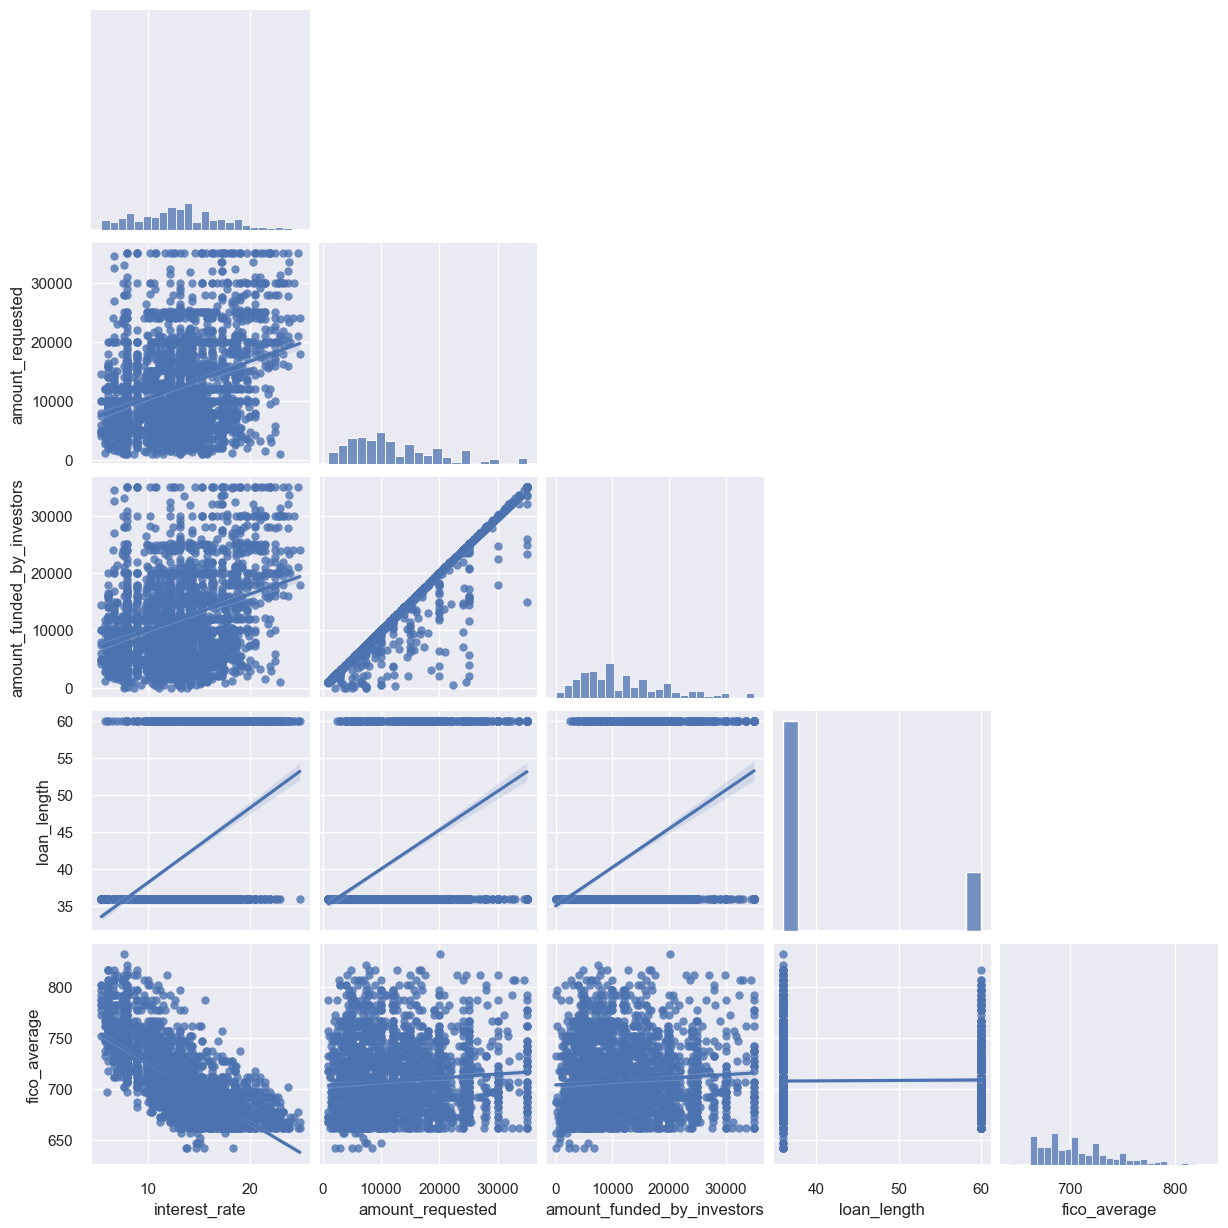

In [54]:
sns.pairplot(banking,kind='reg', corner=True)

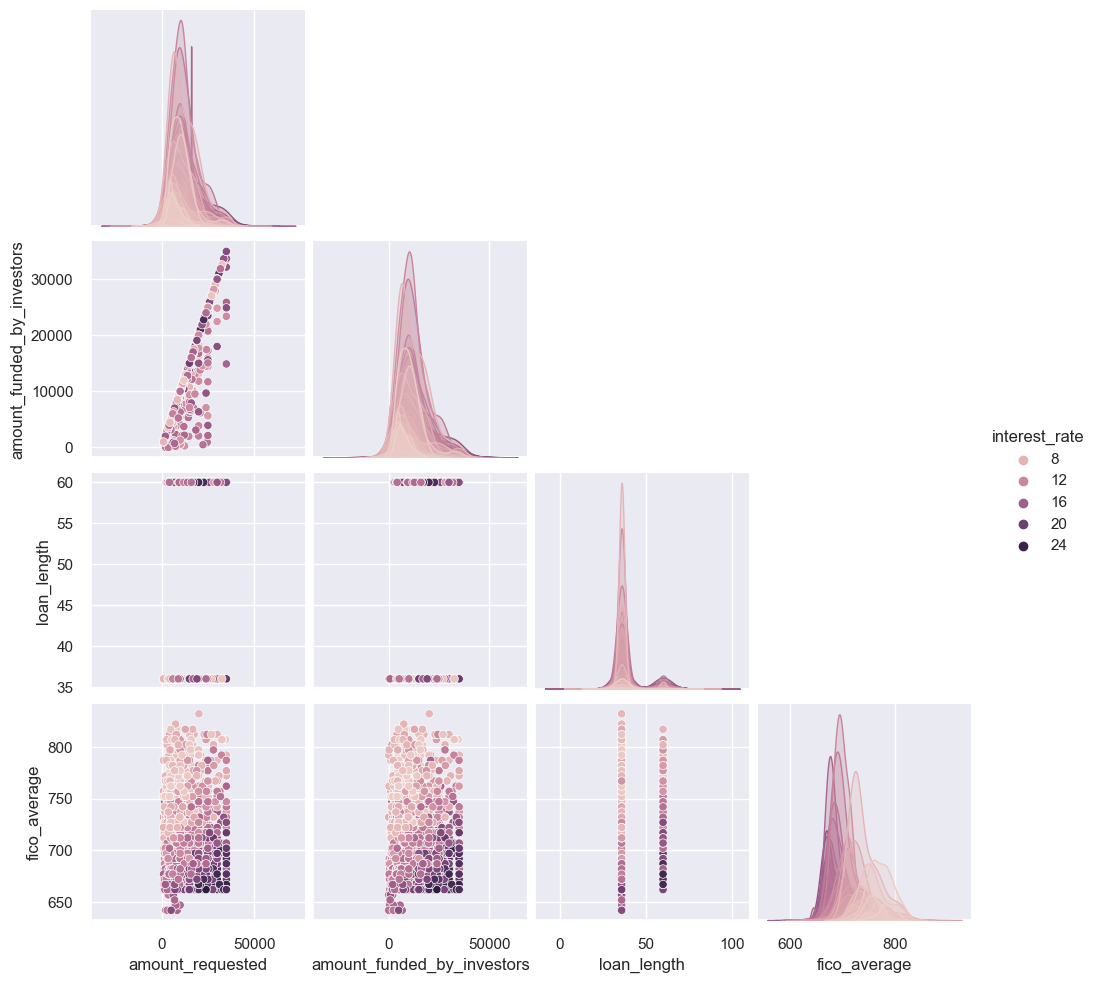

In [55]:
sns.pairplot(banking, hue='interest_rate', corner=True)

In [56]:
scaled = StandardScaler().fit_transform(banking)

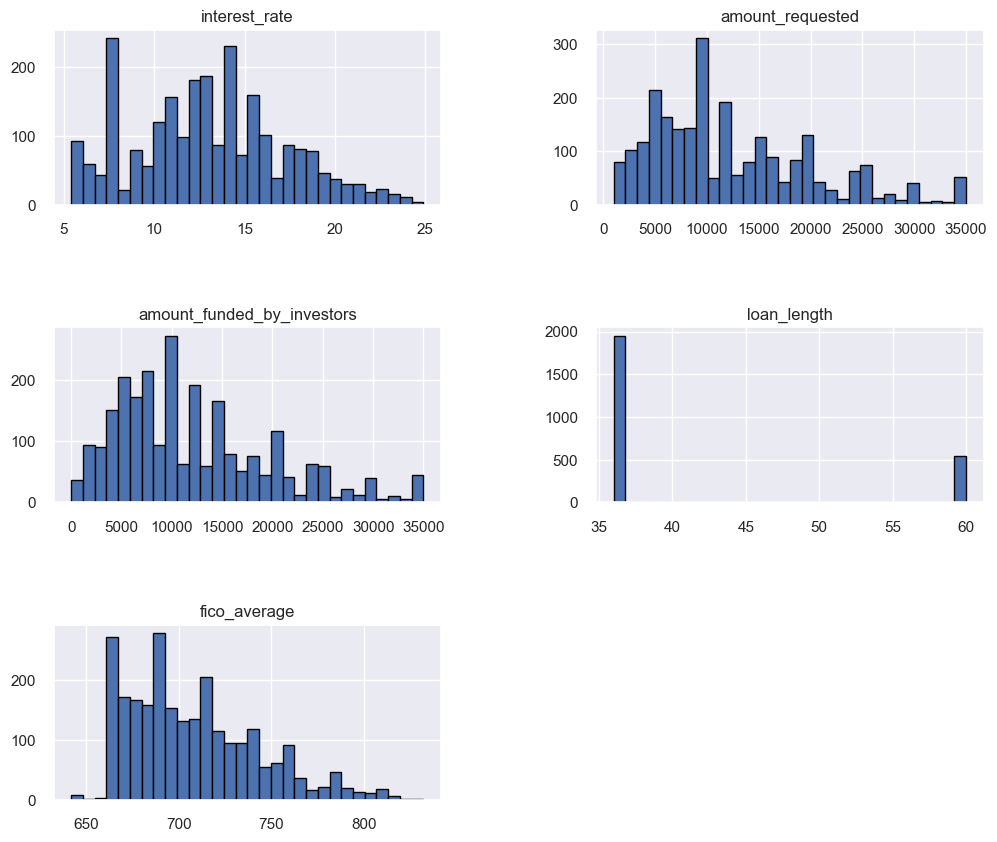

In [57]:
banking.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<Axes: xlabel='interest_rate', ylabel='fico_average'>

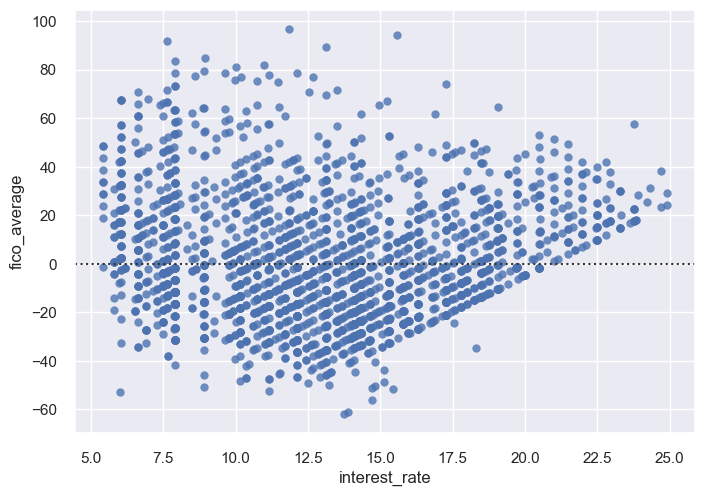

In [58]:
sns.residplot(data=banking, x='interest_rate', y='fico_average')

In [61]:
banking.head(0)

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average


<Axes: xlabel='interest_rate', ylabel='amount_funded_by_investors'>

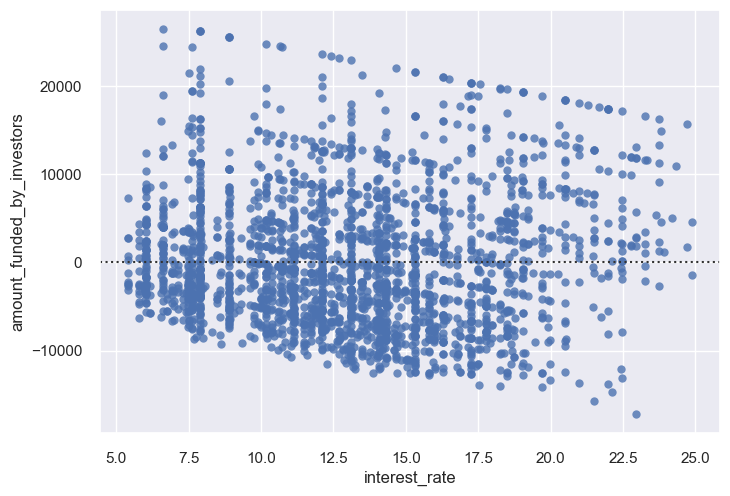

In [59]:
sns.residplot(data=banking, x='interest_rate', y='amount_funded_by_investors')

<Axes: xlabel='interest_rate', ylabel='amount_requested'>

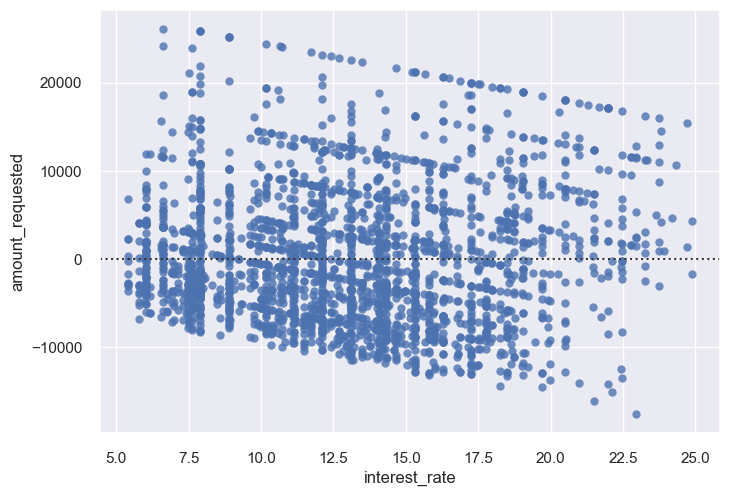

In [60]:
sns.residplot(data=banking, x='interest_rate', y='amount_requested')

In [63]:
X = banking[['amount_requested','amount_funded_by_investors','loan_length','fico_average']]
y = banking['interest_rate']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [83]:
x_train1 = np.asarray(X_train['amount_funded_by_investors'])
x_train2 = np.asarray(X_train['amount_requested'])
x_train3 = np.asarray(X_train['fico_average'])
x_train4 = np.asarray(X_test['loan_length'])
x_test1 = np.asarray(X_test['amount_funded_by_investors'])
x_test2 = np.asarray(X_test['amount_requested'])
x_test3 = np.asarray(X_test['fico_average'])
x_test4 = np.asarray(X_test['loan_length'])

In [81]:
Linear_regression = make_pipeline(StandardScaler(), LinearRegression())
lasso_cv = make_pipeline(StandardScaler(), LassoCV())
ridge_cv = make_pipeline(StandardScaler(), RidgeCV())

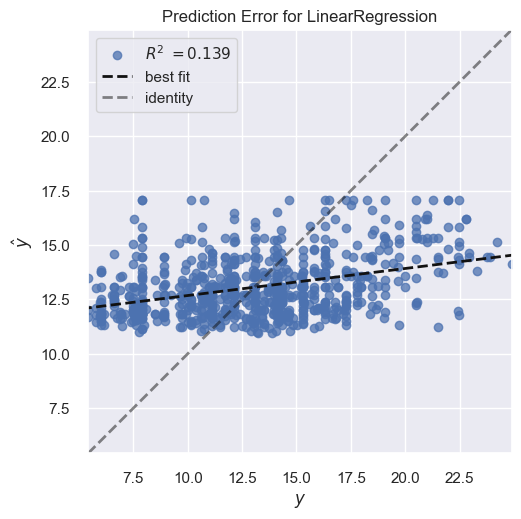

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [82]:
model1 = Linear_regression
visualizer = PredictionError(model1)
visualizer.fit(x_train1.reshape(-1, 1), y_train)  
visualizer.score(x_test1.reshape(-1, 1), y_test)  
visualizer.poof()

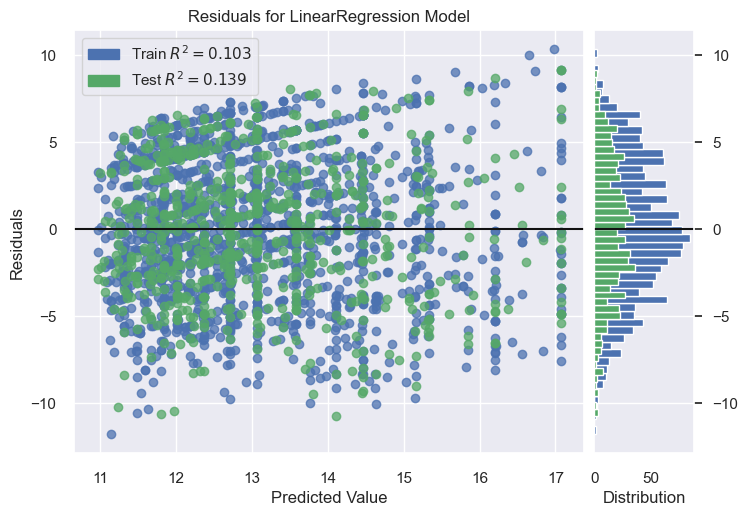

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [84]:
visualizer = ResidualsPlot(model1)
visualizer.fit(x_train1.reshape(-1, 1), y_train)  
visualizer.score(x_test1.reshape(-1, 1), y_test) 
visualizer.poof()

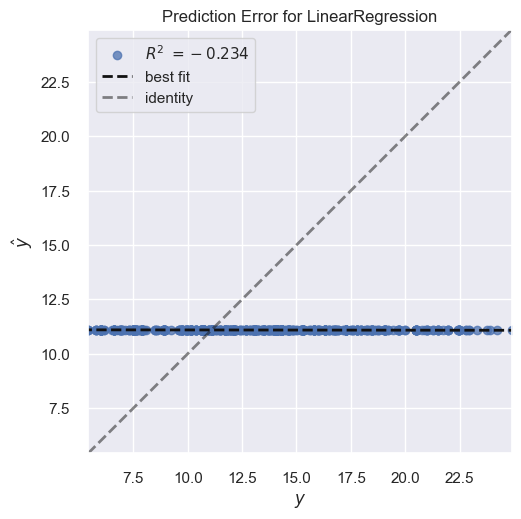

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [85]:
model1 = Linear_regression
visualizer = PredictionError(model1)
visualizer.fit(x_train3.reshape(-1, 1), y_train)  
visualizer.score(x_test3.reshape(-1, 1), y_test)  
visualizer.poof()

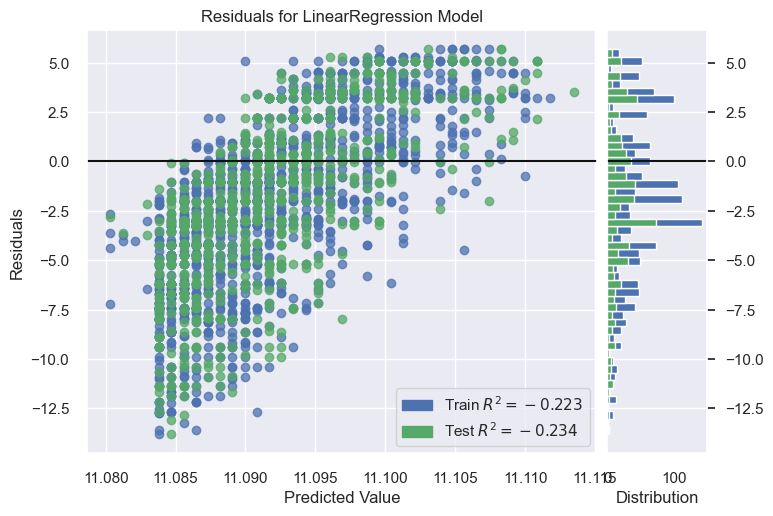

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [86]:
visualizer = ResidualsPlot(model1)
visualizer.fit(x_train3.reshape(-1, 1), y_train)  
visualizer.score(x_test3.reshape(-1, 1), y_test) 
visualizer.poof()